In [3]:
import pandas as pd

In [2]:
#Source configuration

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  # more options can be specified also



### Data loading

In [4]:
#original_data= pd.read_excel('runasimi._original_with_id.ods', engine='odf')
data= pd.read_excel('MASTER_runasimi_original_with_id.ods', engine='odf', sheet_name="RunDESF")

#original_data= pd.read_excel('runasimi._original_with_id.ods', engine='odf')
original_data= data

#Remove phonems
original_data.drop(original_data[original_data["Ima simi"].str.contains('fon')].index, inplace=True)

#Remove suffixes
original_data.drop(original_data[original_data["ID"].isna()].index, inplace=True)


In [45]:
data[data["Ima simi"].str.contains('fon')]

(0, 53)

### Removing suffixes

### Getting the translations

In [ ]:
#Deutsch	English     Español 	Italiano	Français

In [5]:
#Getting missing and existing english translations
column_english_traslations= original_data["English"]

no_english_traslations= original_data[column_english_traslations.isna()]
english_traslations= original_data[column_english_traslations.notna()]

# Getting existing different cases
multiple_translations= english_traslations[english_traslations['English'].str.contains('\;')]

remaining_data = english_traslations.drop(multiple_translations.index, inplace=False)

explained_translations= pd.concat([remaining_data[remaining_data['English'].str.contains('\(')], remaining_data[remaining_data['English'].str.contains('\[')]])

remaining_data.drop(explained_translations.index, inplace=True)


only_explained_translations= remaining_data[remaining_data["English"].str.split(pat=" ").apply(len) > 2]

remaining_data.drop(only_explained_translations.index, inplace=True)

simple_traslations= remaining_data






In [5]:
explained_translations.head()

,ID,Hanan Runasimi,Hanan Runasimi.1,POS,Ima simi,Sikllalla Runasimi,QUS-aiux,BuL-aiux,Tupah Yupanki (Qusqu),Tukuman,Ayakuchu,Qhochapampa,Qullasuyu,QUS-BuL-aiu,Qusqu,Qosqo,Cajamarca (Coombs),Qasamarka,Inkawasi,Laraos,Lamista,Imbabura (runashimi killkay),Quichua (esp. quillcai),Wanka,Jauja Wanka,Huánuco (Weber),Wanuku,"Ankash (ay, aw)","Ankash (ee, oo)",Kurunku,Deutsch,English,Español,Italiano,Français,Dansk/Norsk,Aymara,Avañee,Русский,Yurap uywap salqap amutaypaq sutin,Kaqlla simi,Sut'inchaku,Ima mallki,Explicación del uso de la planta,Gonçalez Holguin y Huaman Poma,Quechua clásico,Waruchiri,Guaro Cheri,Tarma,Pastasa,Napuruna,Runasimi C,Runasimi Nord
59,60.0,achay,achay,s.,s.(2),achay,achay,achay,achay,NaN,NaN,achay,NaN,achay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,das (emphatisch),that (emphatic),eso (enfático),quello [enfatico],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ačay,ačay
79,80.0,Achil Tayta,Achil Tayta,s.,s.(mit)(ecu),Achil Tayta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atsil Tayta,Atsil Taita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vater Atsil (Gott),Father Atsil (god),Padre Atsil (dios),Padre Atsil; dio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atsil Tayta,Atsil Tayta
80,81.0,Achil Yaya,Achil Yaya,s.,s.(mit)(ecu),Achil Yaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atsil Yaya,Atsil Yaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vater Atsil (Gott),Father Atsil (god),Padre Atsil (dios),Padre Atsil; dio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atsil Yaya,Atsil Yaya
104,105.0,achka qullqipaq rantisqa ñin,achka qullqipaq rantisqa ñin,expr.,expr.,achka qullqipaq rantisqa ñin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,achka kullkipak rantishka nin,achca cullquipac rantishca nin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"er (sie) sagt, dass (er (sie) für viel Geld ge...",he (she) says he (she) has bought for a lot of...,dice que ha comprado por mucha plata,dice che gli è costato molto comprarlo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ačka qullqipaq rantišqa ñin,ačka qullqipaq rantišqa ñin
134,135.0,achucha,achucha,s.,s.(tex),achucha,achucha,achucha,achucha,NaN,NaN,achucha,NaN,achucha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pallay-Motiv in Geweben (Bedeutung unklar),"pallay motif in weaving (Bolivia, meaning uncl...",motivo pallay en tejidos (significado no claro),motivo pallay; [è un motivo usato nella decora...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
import plotly.express as px

category= data.groupby("POS").size()

fig = px.pie(category, names=category.index, values=category , title='Part of speech word frequency', width=800, height=700)

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

fig.write_html("file.html")

In [5]:
from xml.etree import cElementTree as ET

tree= ET.parse("quwiki.xml")
root= tree.getroot()
titles= []
texts= []
for page in list(root):
    #print(page)
    title= None
    content= None
    if page is not None:
        if page.find('title') is not None:
            title= page.find('title').text
        content= page.findall('revision')[0].find('text').text
    #print("Tittle: {} \nText: {}".format(title, content))
    titles.append(title)
    texts.append(content)

In [33]:
with open("examples.txt", "w") as file:
    for element in range(len(texts)):
        file.write("Tittle: {} \nText: {} \n\######################\n######################\n".format(titles[element], texts[element]))


In [16]:
import plotly.express as px

data = dict(
    number=[simple_traslations.shape[0], multiple_translations.shape[0], only_explained_translations.shape[0]],
    stage=["Direct translation", "With multiple translations", "Translated by explanation"])
fig = px.funnel(data, x='number', y='stage', )
fig.show()

fig.write_html("available_translations.html")

In [6]:
import plotly.express as px
df = px.data.tips()

only_explained_translations["Number of words"] =only_explained_translations["English"].str.split(pat=" ").apply(len)

fig = px.box(only_explained_translations, y="Number of words", 
                hover_name="Hanan Runasimi", hover_data=["Hanan Runasimi", "English"], points="all", width=1200, height=1400)
fig.show()



/tmp/ipykernel_2843/3561466495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_explained_translations["Number of words"] =only_explained_translations["English"].str.split(pat=" ").apply(len)


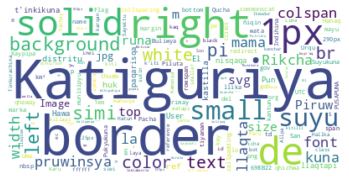

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re


def cleanhtml(raw_html):
    #CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    CLEANR = re.compile('\|*\n') 

    cleantext = re.sub(CLEANR, '', raw_html)
    return cleantext

corpus= ""
for text in texts:
    corpus+= " {}".format(text)

corpus= cleanhtml(corpus)

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(corpus)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:

comma_words= original_data[original_data['Hanan Runasimi'].str.contains(',')]
semicolom_words= original_data[original_data['Hanan Runasimi'].str.contains(';')]
braquets_words= original_data[original_data['Hanan Runasimi'].str.contains('\(')]


(40, 51)
